## Tên: Nguyễn Mạnh Hà
## Tên: Lê Ngọc Tồn 
## Tên: Trần Chí Hùng

## Bài 1: Bài toán phân lớp 2 lóp A, B 1 đặc trưng trong LT

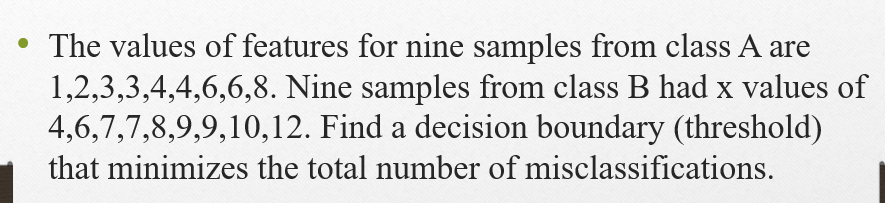

In [ ]:
import matplotlib.pyplot as plt
def find_thresh(a,b):
  c = a+b
  c = sorted(list(set(c)), reverse=False)
  loi = []
  for i in c:
    loi_a, loi_b = 0, 0
    # tìm lỗi của tập a
    for j in range(len(a)):
      if a[j] > i:
        loi_a +=1
    # tìm lỗi của tập b
    for z in range(len(b)):
      if b[z] <= i:
        loi_b +=1
    tongloi = loi_a + loi_b
    loi.append(tongloi)
  min_loi = min(loi)
  nguong = c[loi.index(min_loi)]
  print('Biên phân lớp là '+str(nguong) +' thì tổng lỗi thấp nhất là: '+str(min_loi))

In [ ]:
a = [1, 2, 3, 3, 4, 4, 6, 6, 8]
b = [4, 6, 7, 7, 8, 9, 9, 10, 12]
find_thresh(a,b)

Biên phân lớp là 6 thì tổng lỗi thấp nhất là: 3


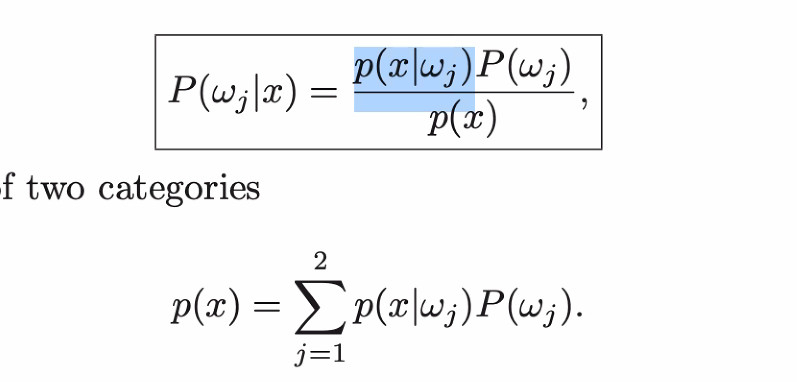

## Bài 2: Tính Posteror: Tỉ lệ tử vong Covid-19 (Tính xác suất hậu nghiệm)

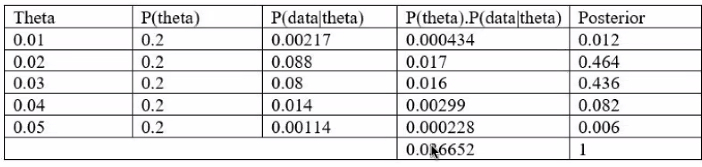

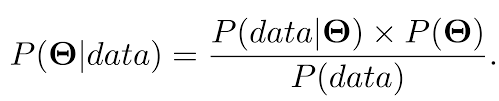

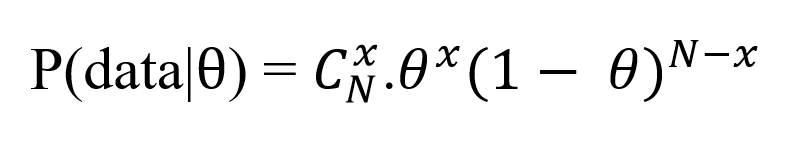

N = 536 --- Tổng số ca nhiễm

x = 13 -- Số ca tử vong

In [ ]:
from math import factorial
#Hàm tính tổ hợp
def nCk(n, r):
    return factorial(n) // factorial(r) // factorial(n-r)

In [ ]:
#Hàm tính P(data|theta)
def pdt(n,x,o):
  kq=nCk(n,x)*pow(o,x)*pow(1-o,n-x)
  return kq

In [ ]:
#số ca nhiễm
n=536
#số ca tử vong
x=13
tt,P,PP,post=[],[],[],[]
o= int(0)
#Nhập theta
while (o != -1):
  o=float(input('Nhập số theta (nhập -1 để dừng): '))
  if o != -1:
    tt.append(o)
#Nhập P(Theta) cho từng theta
print("=============================================")
for i in tt:
  b=float(input('Nhập P(theta) cho theta = '+str(i)+': '))
  P.append(b)
if sum(P) != 1:
  print('lỗi nhập P(theta)')
#Tính P(theta)*P(data|theta)
else:
  for i in range(len(tt)):
    s=P[i]*pdt(536,13,tt[i])
    PP.append(s)
  sumPP=sum(PP)
  #Tính Posterior
  for i in range(len(tt)):
    s=PP[i]/sumPP
    post.append(s)
  index=post.index(max(post))
  print("=============================================")
  for i in range(len(tt)):
    print('Posterior của theta '+str(tt[i]) +' là: '+str(post[i]))
  print("=============================================")
  print('theta tin cậy nhất: '+str(tt[index]) + ' Với Posterior là: '+str(post[index]))

Nhập số theta (nhập -1 để dừng): 0.01
Nhập số theta (nhập -1 để dừng): 0.02
Nhập số theta (nhập -1 để dừng): 0.03
Nhập số theta (nhập -1 để dừng): 0.04
Nhập số theta (nhập -1 để dừng): 0.05
Nhập số theta (nhập -1 để dừng): -1
Nhập P(theta) cho theta = 0.01: 0.2
Nhập P(theta) cho theta = 0.02: 0.2
Nhập P(theta) cho theta = 0.03: 0.2
Nhập P(theta) cho theta = 0.04: 0.2
Nhập P(theta) cho theta = 0.05: 0.2
Posterior của theta 0.01 là: 0.011655786075188987
Posterior của theta 0.02 là: 0.47202209084587604
Posterior của theta 0.03 là: 0.43005908451457886
Posterior của theta 0.04 là: 0.08016218759960658
Posterior của theta 0.05 là: 0.006100850964749492
theta tin cậy nhất: 0.02 Với Posterior là: 0.47202209084587604


## Bài 3: Nhận Dạng chữ sô viết tay:

Mô tả bài toán: Xây dựng mô hình huấn luyện nhận diện chữ số viết tay, sử dụng thư viện MNIST của Tensorflow để huấn luyện.

Đầu Vào: ! bức ảnh ngẫu nhiên của tập test chữ số viết tay:
Đầu Ra : Dự đoán số chữ số viết tay có trong bức ảnh đầu vào:

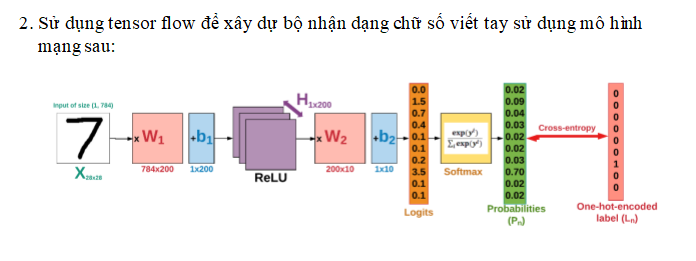

## Nhiệm vụ bài toán

Mục tiêu của chúng tôi là xây dựng và đào tạo một mạng nơ-ron nhân tạo trên hàng nghìn hình ảnh của các chữ số viết tay để nó có thể nhận dạng thành công những người khác khi được trình bày. Dữ liệu sẽ được kết hợp là cơ sở dữ liệu MNIST chứa 60.000 hình ảnh để đào tạo và 10.000 hình ảnh thử nghiệm. Chúng tôi sẽ sử dụng API Keras Python với TensorFlow làm chương trình phụ trợ.

## Sử dụng thư viện keras đẻ build Model

### Import các thư viện cần thiết


In [ ]:
import tensorflow.compat.v1 as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
tf.compat.v1.disable_eager_execution()

### Loading Data

Tập dữ liệu MNIST của tensorflow đã được chia sẵn thành 2 tập sữ liệu là Train:  60000 và Test: 10000

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_train shape', y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
x_test shape (10000, 28, 28)
y_train shape (60000,)
y_train shape (60000,)


HIển thị ngẫu nhiên 1 bức ảnh trong tập dữ liệu:

Giá trị của bức ảnh trong tập train là: 0


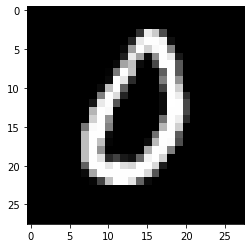

In [ ]:
i=666
plt.imshow(x_train[i],cmap='gray')
print('Giá trị của bức ảnh trong tập train là:',y_train[i])

- Chia tập train thành 2 tập là Train: 80% và Val = 20% 

In [ ]:
from sklearn.model_selection import  train_test_split # Thư viện để tách dữ liệu
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)

Giá trị của bức ảnh trong tập val là: 0


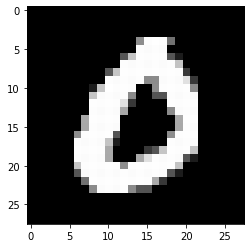

In [ ]:
i=777
plt.imshow(x_val[i],cmap='gray')
print('Giá trị của bức ảnh trong tập val là:',y_val[i])

In [ ]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)
print('x_val shapr', x_val.shape)
print('y_val shape', y_val.shape)

x_train shape (48000, 28, 28)
y_train shape (48000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)
x_val shapr (12000, 28, 28)
y_val shape (12000,)


In [ ]:
x_train = x_train.reshape(48000, 784) # reshape 48,000 28 x 28 matrices into 48,000 784-length vectors.
x_test = x_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.
x_val = x_val.reshape(12000, 784)   # reshape 12,000 28 x 28 matrices into 12,000 784-length vectors.

x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
Y_train = to_categorical(y_train,10)
Y_val =to_categorical(y_val,10)
Y_test = to_categorical(y_test,10)

In [ ]:
# tạo placeholder cho x_train, y_train
X = tf.placeholder(tf.float32,[None,x_train.shape[1]])
Y = tf.placeholder(tf.float32, [None,Y_train.shape[1]])

In [ ]:
# khởi tạo w,b
W = tf.Variable(tf.zeros([x_train.shape[1], Y_train.shape[1]]))
b = tf.Variable(tf.zeros([Y_train.shape[1]]))

In [ ]:
# learning_rate
learning_rate = 0.01


# y dự đoán
logits = tf.matmul(X, W) + b
y_pred = tf.nn.softmax(logits=logits)

# Loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
loss = tf.reduce_mean(entropy)

# accuracy
correct_preds = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

# trình tối ưu hóa
#  gd
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
# adam
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

init = tf.compat.v1.global_variables_initializer()

sess = tf.compat.v1.Session()


sess.run(init)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Buil Model

In [ ]:
# Training
history = {'train_loss':[],'train_accuracy':[],'val_loss':[],'val_accuracy':[]}

for i in range(30):
    _, train_loss,train_accuracy = sess.run([optimizer, loss,accuracy], feed_dict={X : x_train, Y : Y_train})
    history['train_loss'].append(train_loss)
    history['train_accuracy'].append(train_accuracy)
    val_loss, val_accuracy = sess.run([loss, accuracy], feed_dict={X : x_val, Y : Y_val})
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_accuracy)

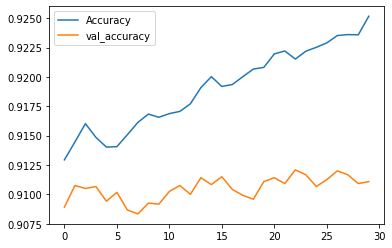

In [ ]:
plt.plot(history['train_accuracy'], label ='Accuracy')
plt.plot(history['val_accuracy'], label ='val_accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = sess.run([loss, accuracy], feed_dict={X : x_test, Y : Y_test})
print("test_accuracy = {}".format(test_accuracy))

test_accuracy = 0.9150999784469604


Số trong hình:1
Dự đoán:1


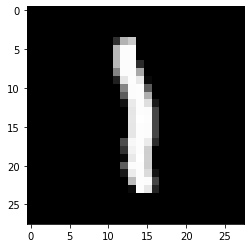

In [ ]:
a= x_val[1]
y_preds = sess.run(y_pred,feed_dict ={X:x_val})
plt.imshow(a.reshape(28,28),cmap='gray')
print("Số trong hình:{}".format(np.argmax(Y_val[1])))
print("Dự đoán:{}".format(np.argmax(y_preds[1])))